In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMC\round-1-island-data-bottle\prices_round_1_day_0.csv', sep=';')
trades = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMC\round-1-island-data-bottle\trades_round_1_day_0_nn.csv', sep=';')

In [18]:
data.head(5)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0


In [19]:
trades.head(5)

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,NaN,NaN,STARFRUIT,SEASHELLS,5041.0,4
1,100,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1
2,300,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,2
3,300,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,1
4,300,NaN,NaN,STARFRUIT,SEASHELLS,5037.0,6


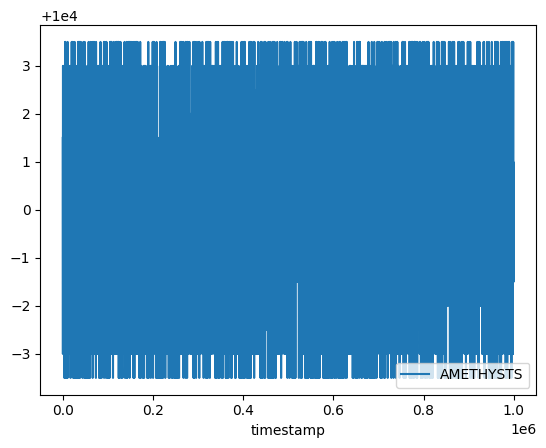

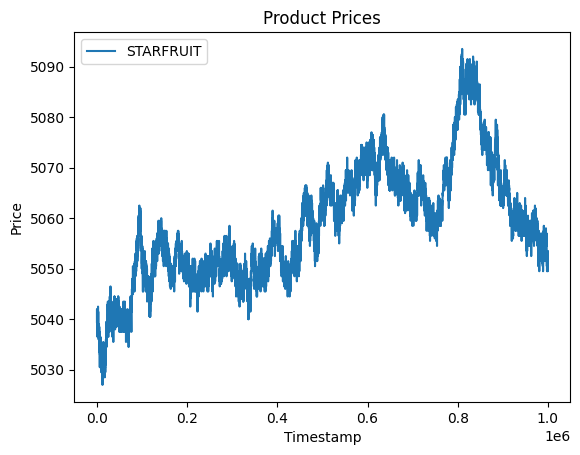

In [23]:
# data.plot(x='timestamp', y='price', kind='line', label='AMETHYSTS')
data[data['product'] == 'AMETHYSTS'].plot(x='timestamp', y='mid_price', kind='line', label='AMETHYSTS')
data[data['product'] == 'STARFRUIT'].plot(x='timestamp', y='mid_price', kind='line', label='STARFRUIT')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Product Prices')
plt.legend()
plt.show()
 

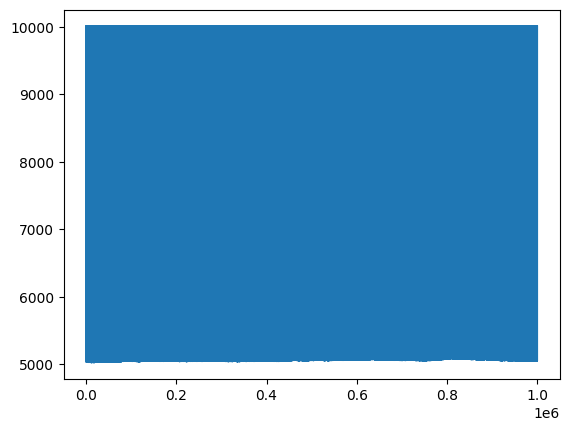

In [12]:
# plotting the data
plt.plot(data['timestamp'], data['mid_price'])

In [39]:
data_a = data[data['product'] == 'AMETHYSTS']
data_b = data[data['product'] == 'STARFRUIT']

In [30]:
upcrossings = len(data_a[(data_a['mid_price'] < 10000) & (data_b['mid_price'].shift(-1) > 10000)])
downcrossings = len(data_b[(data_b['mid_price'] > 10000) & (data_b['mid_price'].shift(-1) < 10000)]) 
print(upcrossings)


611


In [31]:
print(downcrossings)

613


In [36]:
values = len(data_a[data_a['mid_price'] > 10003])
print(values)

values = len(data_a[data_a['mid_price'] < 9997])
print(values)

301
291


In [37]:
import talib

C:\Users\ayush\AppData\Local\Temp\ipykernel_27124\2854770132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b['rsi'] = talib.RSI(data_b['mid_price'].values, timeperiod=14)
C:\Users\ayush\AppData\Local\Temp\ipykernel_27124\2854770132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b['ma'] = talib.MA(data_b['mid_price'].values, timeperiod=14)
C:\Users\ayush\AppData\Local\Temp\ipykernel_27124\2854770132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

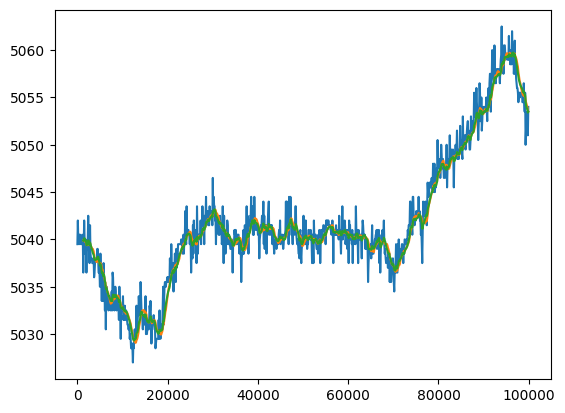

In [41]:
# calculate the RSI, moving average, and exponential moving average
data_b['rsi'] = talib.RSI(data_b['mid_price'].values, timeperiod=14)
data_b['ma'] = talib.MA(data_b['mid_price'].values, timeperiod=14)
data_b['ema'] = talib.EMA(data_b['mid_price'].values, timeperiod=14)

# plot the RSI, moving average, and exponential moving average for a few thousand data points
plt.plot(data_b['timestamp'][:1000], data_b['mid_price'][:1000], label='Price')
plt.plot(data_b['timestamp'][:1000], data_b['ma'][:1000], label='MA')
plt.plot(data_b['timestamp'][:1000], data_b['ema'][:1000], label='EMA')



In [42]:
def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'ret_60', 'ret_300']):
# def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10']):
# def print_corrs(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300']):
# def print_corrs(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60']):
    msg = "                                      "
    for ret in rets:
        msg += f"{ret:>8s}"
    print(msg)
    for alpha in alphas:
        msg = f"{alpha:30s} corr -> "
        for ret in rets:
            msg += f"{df[alpha].corr(df[ret])*100:7.2f} "
        print(msg)
    print()

In [59]:
def print_buckets(df, alphas, rets = ['ret_10', 'ret_30', 'ret_60', 'ret_300', 'tick_10'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60'], aggfunc = ['mean', 'median', 'count']):
    for alpha in alphas:
        msg = df.pivot_table(index = pd.qcut(df[alpha],7,duplicates='drop'), values=rets, aggfunc=aggfunc)
        print(msg)

In [60]:
def add_ret(df, rets = [1, 5, 10, 30, 60, 300]):
    
    for ret in rets:
        df[f'ret_{ret}'] = df['mid_price'].shift(-ret)
        df[f'ret_{ret}'] = (df[f'ret_{ret}'] - df['mid_price']) / df['mid_price'] * 1e4
        # df = df.dropna()    
    return df



In [61]:
df = add_ret(data_b)

C:\Users\ayush\AppData\Local\Temp\ipykernel_27124\3639187958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'ret_{ret}'] = df['mid_price'].shift(-ret)
C:\Users\ayush\AppData\Local\Temp\ipykernel_27124\3639187958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'ret_{ret}'] = (df[f'ret_{ret}'] - df['mid_price']) / df['mid_price'] * 1e4


In [62]:
df.head(5)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,profit_and_loss,rsi,ma,ema,ret_1,ret_5,ret_10,ret_30,ret_60,ret_300
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,...,0.0,NaN,NaN,NaN,4.960810,1.984324,0.992162,-2.976486,-9.921619,13.890267
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,...,0.0,NaN,NaN,NaN,-3.966680,-2.975010,-2.975010,-7.933360,-18.841729,0.991670
5,0,200,STARFRUIT,5037,1,5036.0,21.0,NaN,NaN,5043,...,0.0,NaN,NaN,NaN,0.992063,0.000000,0.000000,-3.968254,-10.912698,8.928571
6,0,300,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5044,...,0.0,NaN,NaN,NaN,-1.983930,-1.983930,-7.935721,-5.951790,-19.839302,5.951790
9,0,400,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5042,...,0.0,NaN,NaN,NaN,1.984324,0.000000,0.000000,-3.968648,-8.929457,7.937295


In [75]:
alphas = ['rsi', 'ma', 'ema' ,'ema_rsi' , 'wo_rsi']
rets = ['ret_1', 'ret_5', 'ret_10', 'ret_30', 'ret_60', 'ret_300']
print_corrs(df, alphas, rets)

                                         ret_1   ret_5  ret_10  ret_30  ret_60 ret_300
rsi                            corr ->  -45.31  -40.61  -36.22  -25.68  -20.10  -15.06 
ma                             corr ->   -1.03   -2.78   -4.63  -10.19  -16.24  -37.84 
ema                            corr ->   -1.45   -3.17   -4.98  -10.44  -16.43  -37.96 
ema_rsi                        corr ->  -45.22  -40.50  -36.15  -25.70  -20.24  -14.98 
wo_rsi                         corr ->  -31.37  -29.01  -25.48  -17.09  -12.65   -9.85 



In [76]:
print_buckets(df, alphas, rets)

                                  mean                                \
                                 ret_1    ret_10    ret_30   ret_300   
rsi                                                                    
(31.782999999999998, 44.983]  2.463751  2.415751  2.553501  4.360066   
(44.983, 47.528]              0.886644  1.055446  1.156762  3.656701   
(47.528, 49.207]              0.371239  0.203484  0.188995  1.654125   
(49.207, 50.862]              0.047216  0.181909 -0.113905  0.930555   
(50.862, 52.562]             -0.263839 -0.298195 -0.236921  0.409152   
(52.562, 55.168]             -0.930975 -0.879033 -0.866815 -0.516777   
(55.168, 76.72]              -2.553583 -2.493346 -2.070798 -2.158214   

                                                    median            \
                                 ret_5    ret_60     ret_1    ret_10   
rsi                                                                    
(31.782999999999998, 44.983]  2.430672  2.743540  1.978435  1.9

In [68]:
def calculate_rsi(data, window=14):
    close_prices = data['mid_price']
    delta = close_prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['wo_rsi'] = calculate_rsi(data_b)


C:\Users\ayush\AppData\Local\Temp\ipykernel_27124\2002788067.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wo_rsi'] = calculate_rsi(data_b)


In [74]:
def calculate_exponential_rsi(df, window=14):
    period = window
    close_delta = df['mid_price'].diff()
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    up_ewm = up.ewm(alpha=1/period).mean()
    down_ewm = down.ewm(alpha=1/period).mean()

    rs_ewm = up_ewm / down_ewm
    rsi_ewm = 100 - (100/(1 + rs_ewm))
    return rsi_ewm

df['ema_rsi'] = calculate_exponential_rsi(data_b)


C:\Users\ayush\AppData\Local\Temp\ipykernel_27124\4277889686.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ema_rsi'] = calculate_exponential_rsi(data_b)


In [65]:
df['ema_slow'] = talib.EMA(data_b['mid_price'].values, timeperiod=40)

C:\Users\ayush\AppData\Local\Temp\ipykernel_27124\1995177578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ema_slow'] = talib.EMA(data_b['mid_price'].values, timeperiod=40)


In [ ]:
plt.pl

In [ ]:
def calculate_simple_rsi_like(df, window=14, rsi_string=""):
  """
  This function calculates a value similar to the RSI using only current and recent data.

  Args:
      df (pandas.DataFrame): The DataFrame containing the 'mid_price' column.
      window (int, optional): The lookback window for calculating the SMA. Defaults to 14.
      rsi_string (str, optional): A string containing comma-separated past price changes 
          (default: "").

  Returns:
      pandas.DataFrame: The DataFrame with an additional column named 'rsi_like'.
      str: The updated string containing past price changes.
  """

  # Extract price changes from current and potentially stored string
  price_changes = []
  if rsi_string:
      price_changes = [float(x) for x in rsi_string.split(",")]
      if len(price_changes) > window:
          price_changes = price_changes[-window:]  # Keep only the most recent window values
  price_changes.append(df['mid_price'].diff().iloc[-1])  # Add the newest price change

  # Calculate SMA of recent price changes (assuming non-empty price_changes)
  avg_change = sum(price_changes) / len(price_changes)

  # Calculate gain and loss based on current and average changes
  gain = max(0, price_changes[-1])
  loss = abs(min(0, price_changes[-1]))

  # Calculate a value similar to RSI (replace with your desired formula)
  rsi_like = 100 - (100 / (1 + (gain / (loss + 1e-7)))))  # Avoid division by zero

  # Update the string with past changes
  rsi_string = ",".join(map(str, price_changes[1:])) + "," + str(price_changes[-1])

  df['rsi_like'] = rsi_like
  return df, rsi_string